# Preprocesamiento y procesamiento de Datos
Este notebook se encarga de cargar y preprocesar, aumentar y dividir los datos necesarios para el entrenamiento del modelo.

In [1]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import logging
import os
from pathlib import Path

In [2]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

file_logs = Path('../logs') / 'data_processing.log'

# Configuración del logging
logging.basicConfig(
    filename=file_logs,
    filemode="a",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)


## Funciones de preprocesamiento

## Carga de Datos
Cargamos los datos desde su fuente y verificamos los primeros registros para entender su estructura.


In [3]:
test_img_path = "../../data/raw/Static-Hand-Gestures-of-the-Peruvian-Sign-Language-Alphabet/a/a (109).jpg"

img = skimage.io.imread(test_img_path)

In [4]:
import sys
sys.path.insert(0, os.getcwd() + "../preprocessing")
print(sys.path)

['/home/rosewt/Documentos/codigos2024/SordoMudos/src/notebooks../preprocessing', '/home/rosewt/miniconda3/envs/img/lib/python312.zip', '/home/rosewt/miniconda3/envs/img/lib/python3.12', '/home/rosewt/miniconda3/envs/img/lib/python3.12/lib-dynload', '', '/home/rosewt/miniconda3/envs/img/lib/python3.12/site-packages', '/home/rosewt/miniconda3/envs/img/lib/python3.12/site-packages/setuptools/_vendor']


## Benchamarking


In [5]:
import time

import sys
sys.path.append('/home/rosewt/Documentos/codigos2024/SordoMudos/src/preprocessing/.')
print(sys.path)

from s_preprocessing import convert_to_silhouette, binarize_image_with_canny, binarize_with_canny_cv2


start = time.time()
convert_to_silhouette(img)
print(f"to_silhouette: {time.time() - start:2e}")

start = time.time()
binarize_image_with_canny(img)
time_manual_canny = time.time() - start

start = time.time()
binarize_with_canny_cv2(img)
time_cv2_canny = time.time() - start

print(f"binarize_with_canny: {time_manual_canny:2e}")
print(f"binarize_with_canny_cv2: {time_cv2_canny:2e}")
print(f"binarize_with_canny_cv2 es {time_manual_canny / time_cv2_canny:2f} veces más rápido que binarize_with_canny")


['/home/rosewt/Documentos/codigos2024/SordoMudos/src/notebooks../preprocessing', '/home/rosewt/miniconda3/envs/img/lib/python312.zip', '/home/rosewt/miniconda3/envs/img/lib/python3.12', '/home/rosewt/miniconda3/envs/img/lib/python3.12/lib-dynload', '', '/home/rosewt/miniconda3/envs/img/lib/python3.12/site-packages', '/home/rosewt/miniconda3/envs/img/lib/python3.12/site-packages/setuptools/_vendor', '/home/rosewt/Documentos/codigos2024/SordoMudos/src/preprocessing/.']
to_silhouette: 4.341602e-04
binarize_with_canny: 1.797438e-03
binarize_with_canny_cv2: 1.449585e-04
binarize_with_canny_cv2 es 12.399671 veces más rápido que binarize_with_canny


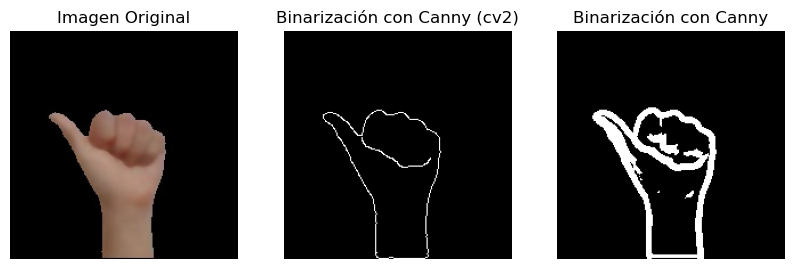

In [6]:
# Cargar una imagen y aplicar el preprocesamiento (descomenta y ajusta la ruta según sea necesario)

silhouette_img = convert_to_silhouette(img)
binary_img = binarize_image_with_canny(img)
bin2 = binarize_with_canny_cv2(img)
# Mostrar los resultados

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binary_img, cmap="gray")
plt.title("Binarización con Canny")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(bin2, cmap="gray")
plt.title("Binarización con Canny (cv2)")
plt.axis("off")

plt.show()


## Cargar todas las imagenes

In [7]:
import sys
sys.path.insert(0, os.getcwd() + "../preprocessing")


import data_processing as dp

try:
    data_directory = '../../data/raw/Static-Hand-Gestures-of-the-Peruvian-Sign-Language-Alphabet'
    data_output = '../../data/processed/split'

    imgs_train, imgs_test, labels_train, labels_test,\
          imgs_val, label_val, label_to_index = dp.process_imgs(
              data_directory, method='canny', data_output = data_output
              )
    
    logging.info("Ejecución completa. Datos listos para uso.")
    print("Proceso completado. Datos listos para uso.")
except Exception as e:
    print(e)
    logging.error(f"Error durante la ejecución principal: {e}")
    print("Hubo un error durante el procesamiento. Revisa el log para más detalles.")


Proceso completado. Datos listos para uso.
